## Продажа компьютерных игр

Из открытых источников были выгружены исторические данные о продажах компьютерных игр в различных регионах до 2016 года. Задача - выявить закономерности, которые позволят интернет-магазину увеличить продажи, предлагая покупателям наиболее интересный продукт в 2017 году. Проверим две гипотезы: 
- 

### План решения задачи

##### Часть 1. Подготовка данных:
* [1. Изучение общей информации](#1-bullet)
* [2. Подготовка данных](#2-bullet)

##### Часть 2. Исследовательский анализ данных:
* [1. Общий анализ продаж](#3-bullet)
* [2. Поиск актуальных платформ](#4-bullet)
* [3. Влияние продаж на рейтинги](#5-bullet)

##### Часть 3. Портрет пользователя каждого региона:
* [1. Северная Америка (na_sales)](#6-bullet)
* [2. Европа (eu_sales)](#7-bullet)
* [3. Япония (jp_sales)](#8-bullet)

##### Часть 4. Проверка гипотез:
* [1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#9-bullet)
* [2. Средние пользовательские рейтинги жанров Action и Sports разные](#10-bullet)
* [3. Общий вывод](#11-bullet)

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats as st

pd.options.display.float_format = '{:,.2f}'.format

## Часть 1. Подготовка данных 

### Изучение общей информации <a id='1-bullet'></a>

In [207]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [208]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучим некоторые столбцы подробнее

In [209]:
# Число уникальных игр - одна игра может быть выпущена сразу на нескольких платформах

print('Всего строчек в датасете: ', len(games['Name']))
print('Число уникальных игр: ', len(games['Name'].unique()))

Всего строчек в датасете:  16715
Число уникальных игр:  11560


In [210]:
# Какие платформы представлены

games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [211]:
# Какие жанры представлены

games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [212]:
# Распределение по возрастному рейтингу

games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [213]:
# Среди оценок пользователей присутствует аббревиатура 'tbd'

len(games.query("User_Score == 'tbd'"))

2424

#### Вывод 
В данных присутствует большое количество пропусков, особенно в столбцах с рейтингом и оценками. Кроме того, следует приобразовать некоторые данные в нужные типы: год выпуска и оценки критиков должны быть целочисленными, а пользовательские оценки в дробном формате. Значение tbd (to be defined) в "User_Score" означает, что оценка не была поставлена, а значит эти строки следует поменять на пропуски


### 2. Подготовка данных <a id='2-bullet'></a>

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему. 
- Обработайте пропуски при необходимости
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [214]:
games.columns = games.columns.str.lower()
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [215]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Начнем по порядку - **name**

In [216]:
games['name'].isnull().sum()

2

In [217]:
# посмотрим пропуски

games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


С этими строками мы ничего поделать не можем, но оставим, так как цифры по продажам есть

**year_of_release**

In [218]:
games['year_of_release'].isnull().sum()

269

In [219]:
games[games['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN


Чаще всего игры выпускают одновременно сразу на нескольких платформах, а если дата и различается, то, как правило, несущественно.

In [220]:
games.query("name == 'Madden NFL 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
1881,Madden NFL 2004,XB,"2,003.00",Sports,1.02,0.02,0.00,0.05,92.00,8.3,E
3889,Madden NFL 2004,GC,"2,003.00",Sports,0.40,0.10,0.00,0.01,94.00,7.7,E
5708,Madden NFL 2004,GBA,"2,003.00",Sports,0.22,0.08,0.00,0.01,70.00,6.6,E


In [221]:
# для работы функции нужен датасет без пропусков

filled_df = games[games['year_of_release'].notnull()]

In [222]:
def fill_na_col(row):
    col = 'year_of_release'
    rows = filled_df[filled_df['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [223]:
games['year_of_release'] = games.apply(fill_na_col, axis=1).astype('Int64')

In [224]:
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12334,Tournament of Legends,Wii,2010,Fighting,0.04,0.02,0.00,0.01,45.00,6.9,T
3255,Bahamut Lagoon,SNES,1996,Role-Playing,0.00,0.00,0.62,0.00,nan,NaN,NaN
5545,EA Playground,DS,2007,Sports,0.29,0.01,0.00,0.03,60.00,7.6,E
6933,Afro Samurai,X360,2009,Action,0.16,0.05,0.00,0.02,65.00,6.2,M
15665,Barbie as the Princess and the Pauper,GBA,2004,Adventure,0.01,0.00,0.00,0.00,nan,tbd,E


In [225]:
# часть пропусков осталась - удалять не будем, так в данных присутствуют нужные значения для дальнейших расчетов

games['year_of_release'].isnull().sum()

146

In [226]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.00,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.00,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,nan,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,nan,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [227]:
# вроде без аномалий

print('Самые старые игры были выпущены: ', games['year_of_release'].min())
print('Самые новые игры были выпущены: ', games['year_of_release'].max())

Самые старые игры были выпущены:  1980
Самые новые игры были выпущены:  2016


**user_score**

In [228]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение tbd (to be defined) означает, что оценка не была поставлена, а значит эти строки следует поменять на пропуски

In [229]:
print('Число tbd до замены: ', len(games.query('user_score == "tbd"')))

games['user_score'].loc[games['user_score'] == 'tbd'] = np.nan
games['user_score'] = games['user_score'].astype('float') # оценки должны быть в дробном формате

print('Число tbd после замены: ', len(games.query('user_score == "tbd"')))

Число tbd до замены:  2424
Число tbd после замены:  0


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [230]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**critic_score**

Критики ставят только целые оценки - меняем формат 

In [231]:
games['critic_score'] = games['critic_score'].astype('Int64')

**total_sales** - добавим новый столбец с суммой всех продаж

In [232]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15497,The Legend of Heroes: Trails in the Sky Second...,PS3,2007,Role-Playing,0.00,0.00,0.02,0.00,NaN,nan,NaN,0.02
5755,My Horse & Me,Wii,2007,Sports,0.27,0.02,0.00,0.02,NaN,nan,NaN,0.31
13756,Mazes of Fate DS,DS,2008,Role-Playing,0.04,0.00,0.00,0.00,NaN,nan,T,0.04


In [233]:
games.isnull().sum().sort_values(ascending = False)/games.shape[0]*100

user_score        54.59
critic_score      51.32
rating            40.48
year_of_release    0.87
genre              0.01
name               0.01
total_sales        0.00
other_sales        0.00
jp_sales           0.00
eu_sales           0.00
na_sales           0.00
platform           0.00
dtype: float64

По некоторым столбцам наблюдается большой процент пропусков, которые заполнить не получится: одна и таже игра может иметь разных успех на разных платформах. Тем не менее, данных все равно должно хватить для анализа.

## Часть 2. Исследовательский анализ данных <a id='2-bullet'></a>

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница впродажах? А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывамии продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можносказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Общий анализ продаж <a id='3-bullet'></a>

Text(0.5, 0, 'год выпуска')

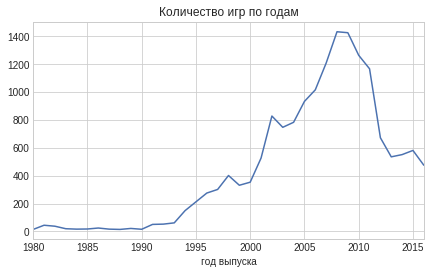

In [234]:
# сколько игр выпускалось в разные годы

(
games
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .sort_values('year_of_release', ascending=False)
    .plot(figsize=(7, 4), legend=False, title='Количество игр по годам')
    .set_xlabel('год выпуска')
)

Простые компьютерные игры создавались еще с 1950-х годов, но лишь 1980-х получили распространение благодаря появлению аркадных автоматов, консолей и домашних ПК. В 1990-х игры стали еще более популярными благодаря переходу к полигональному 3D и появлению новых жанров: шутеров, стретегий и ММО. Определенное насыщение рынка наблюдается в конце нулевых: потребители стали гораздо более требовательны, а разработчики сосредоточились не на количестве, а на качестве продукции. Игровая индустрия постоянно трансформируется поэтому для прогнозов лучше использовать самые свежие данные, например, за последние 10 лет.

Мы видим, что массовый характер выпуск игр стал приобретать с 1990-х годов. Чтобы упростить анализ удалим данные за предыдущие года. 

In [235]:
games = games.query("year_of_release > 1992")

Text(0.5, 0, 'год выпуска')

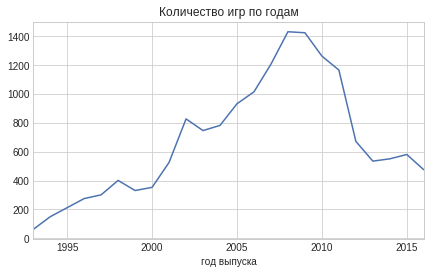

In [236]:
(
games
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .sort_values('year_of_release', ascending=False)
    .plot(figsize=(7, 4), legend=False, title='Количество игр по годам')
    .set_xlabel('год выпуска')
)

Text(0.5, 0, 'Названия платформ')

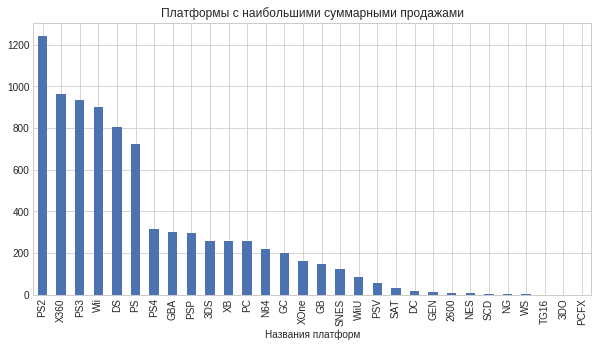

In [237]:
# платформы с наибольшими суммарными продажами

(
games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', figsize=(10, 5), legend=False, title='Платформы с наибольшими суммарными продажами')
    .set_xlabel('Названия платформ')
)

Первые шесть заметно выбиваются - будем строить распределение по ним.

In [238]:
top_sales6 = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .head(6)
)

top_sales6

,total_sales
platform,
PS2,"1,243.20"
X360,965.19
PS3,933.14
Wii,902.87
DS,804.09
PS,723.88


In [239]:
def total_sales_by_platform_per_year(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

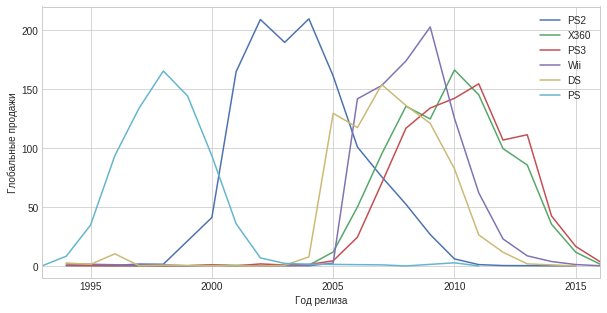

In [240]:
for platform in list(top_sales6.index):
    total_sales_by_platform_per_year(platform, games)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза")
    plt.ylabel("Глобальные продажи")
    plt.legend()

У каждой платформы есть свой срок жизни, который в среднем составляет 10 лет. Тем не менее, нас интересуют только актуальные платформы: растущие в популярности или находящиес на пике, а именно находящиеся в первой половине своего жизненного пути. Именно промежуток времени между 2011-2016 мы будем использовать дальше в качестве "актуального периода": его будет достаточно, чтобы проанализировать развитие самых свежих и прибыльных приставок последних лет.

### 2. Поиск актуальных платформ <a id='4-bullet'></a>

In [241]:
relevant_years = games[games['year_of_release'] > 2011]

In [242]:
relevant_years.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16168,War for the Overworld,PC,2015,Strategy,0.00,0.01,0.00,0.00,65,7.70,NaN,0.01
12516,Attack on Titan (KOEI),XOne,2016,Action,0.02,0.03,0.00,0.00,NaN,nan,NaN,0.05
3919,Dishonored,PC,2012,Action,0.26,0.19,0.00,0.06,NaN,nan,NaN,0.51
10605,Resident Evil: Revelations 2,PSV,2015,Action,0.00,0.03,0.07,0.01,65,7.80,M,0.11
15053,Diabolik Lovers: Vandead Carnival,PSV,2014,Action,0.00,0.00,0.02,0.00,NaN,nan,NaN,0.02


Text(0.5, 0, 'Названия платформ')

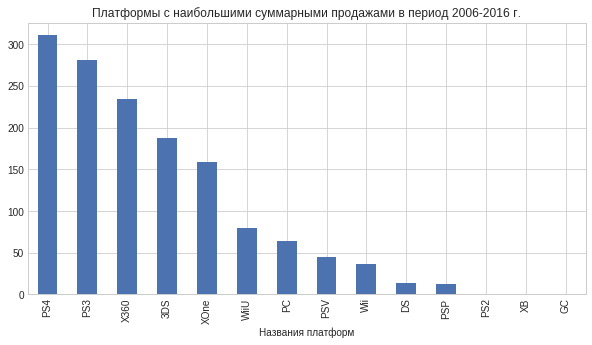

In [243]:
(
relevant_years
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', figsize=(10, 5), legend=False, title='Платформы с наибольшими суммарными продажами в период 2006-2016 г.')
    .set_xlabel('Названия платформ')
)

In [244]:
print('Суммарная прибыль трех самх непопулярных платформ: ', 
      relevant_years.query('platform in ["PS2", "XB", "GC"]')['total_sales'].sum())
relevant_years.query('platform in ["PS2", "XB", "GC"]')

Суммарная прибыль трех самх непопулярных платформ:  0.55


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5716,FIFA Street,PS2,2012,Sports,0.15,0.12,0.00,0.04,59,7.90,E,0.31
10524,FIFA Street,XB,2012,Sports,0.08,0.02,0.00,0.00,60,8.00,E,0.10
12754,FIFA Street,GC,2012,Sports,0.04,0.01,0.00,0.00,NaN,nan,NaN,0.05
13025,Legend of Kay,PS2,2015,Action,0.03,0.02,0.00,0.01,72,7.30,E10+,0.06
14633,Culdcept,PS2,2012,Strategy,0.01,0.01,0.00,0.00,78,8.90,T,0.02
16151,Sangoku Koi Senki: Otome no Heihou!,PS2,2012,Adventure,0.00,0.00,0.01,0.00,NaN,nan,NaN,0.01


В выборку попали платформы формально существующие, но почти не генирирующие прибыли - уберем их. Что касается других платформ с низкой прибылью, необходимо присмотреться к ним поближе.

In [245]:
relevant_years = relevant_years.query('platform not in ["PS2", "XB", "GC"]')

In [246]:
top_relevant_sales = (
    relevant_years
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

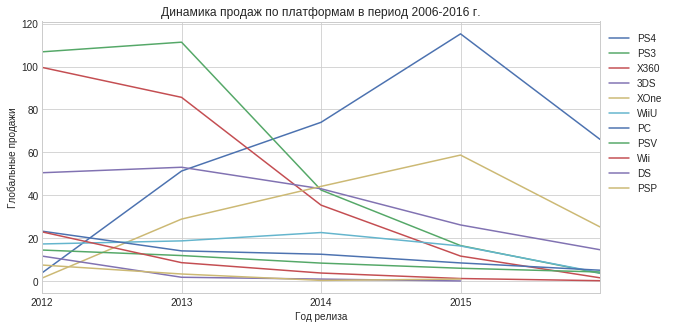

In [247]:
year_min = relevant_years['year_of_release'].min()
year_max = relevant_years['year_of_release'].max()

for platform in list(top_relevant_sales.index):
    total_sales_by_platform_per_year(platform, relevant_years)['total_sales'].plot(figsize=(10, 5), label=platform, 
                                                    title='Динамика продаж по платформам в период 2006-2016 г.')
    
    plt.xlabel("Год релиза")
    plt.ylabel("Глобальные продажи")
    plt.legend(bbox_to_anchor=(1.0, 0.99))
    plt.xticks(range(year_min, year_max, 1))

In [250]:
(
games
    .pivot_table(index='platform', values ='name', aggfunc='count')
    .sort_values(by = 'name', ascending = False)
    .head(16)
)

,name
platform,
PS2,2135
DS,2126
PS3,1317
Wii,1298
X360,1248
PSP,1201
PS,1184
PC,965
XB,814


Самыми "потенциальными" в нашей выборке являются самые новые платформы: **PS4** и **XOne**, которые появились примерно в одинаковое время и заменили устаревшие приставки от Sony и Microsoft - **PS3** и **X360**.

По сравнению с другими платформами, там было выпущено достаточно небольшое количество игр, но, согласно нашей логике - жизненный цикл платформ составляет примерно 10 лет - со временем они вполне могут догнать свои предыдущие версии. 

**"Ящик с усами" по продажам PS4 и X360**

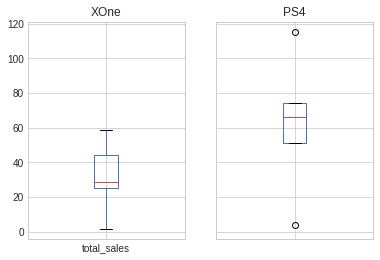

Сумма общих продаж XOne: 158.43
Сумма общих продаж PS4: 310.46
Среднее значение общих продаж XOne:31.69
Среднее значение общих продаж PS4:62.09


In [251]:
fig, axs = plt.subplots(1, 2, sharey=True)

for num, platform in enumerate(['XOne', 'PS4']):
    df = total_sales_by_platform_per_year(platform, relevant_years)
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

print('Сумма общих продаж XOne: {:.2f}'.format(total_sales_by_platform_per_year('XOne', relevant_years)['total_sales'].sum()))
print('Сумма общих продаж PS4: {:.2f}'.format(total_sales_by_platform_per_year('PS4', relevant_years)['total_sales'].sum()))

print('Среднее значение общих продаж XOne:{:.2f}'.format(total_sales_by_platform_per_year('XOne', relevant_years)['total_sales'].mean()))
print('Среднее значение общих продаж PS4:{:.2f}'.format(total_sales_by_platform_per_year('PS4', relevant_years)['total_sales'].mean()))

**PS4** не только обгоняет **XOne** по количеству выпущенных игр, но и по объему сгенерированной выручки как средней, так и совокупной.

### 3. Влияние продаж на рейтинги <a id='5-bullet'></a>

In [252]:
# разделим выборку

ps4 = relevant_years.query("platform == 'PS4'")
xone = relevant_years.query("platform == 'XOne'")

In [253]:
ps4[['user_score', 'critic_score', 'total_sales']].corr().style.format("{:.2%}")

,user_score,critic_score,total_sales
user_score,100.00%,55.98%,-3.21%
critic_score,55.98%,100.00%,41.01%
total_sales,-3.21%,41.01%,100.00%


In [254]:
xone[['user_score', 'critic_score', 'total_sales']].corr().style.format("{:.2%}")

,user_score,critic_score,total_sales
user_score,100.00%,47.25%,-6.29%
critic_score,47.25%,100.00%,41.70%
total_sales,-6.29%,41.70%,100.00%


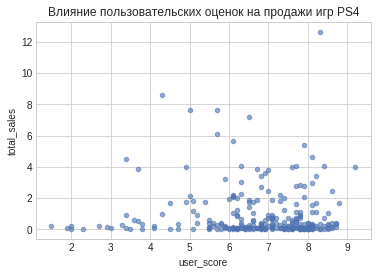

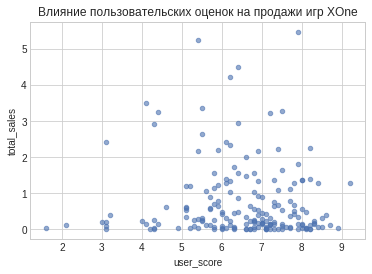

In [255]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.6, title='Влияние пользовательских оценок на продажи игр PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.6, title='Влияние пользовательских оценок на продажи игр XOne')
plt.show()

Взаимосвязи между оценками пользователей и объемом продаж нет

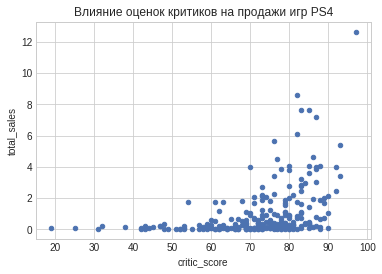

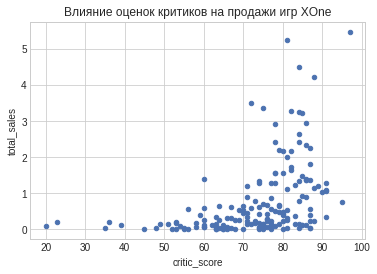

In [256]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='Влияние оценок критиков на продажи игр PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Влияние оценок критиков на продажи игр XOne')
plt.show()

Взаимосвязь между оценками критиков и объемам присутствует, но она очень слабая. Можно сделать вывод, что пользователи склонны доверять критикам больше, чем другим геймерам. Так что разработчики игр не зря тратят деньги на маркетинговые кампании с участием СМИ и блогеров - хороший отзыв критика может увеличить продажи.

Text(0.5, 0, 'Названия жанров')

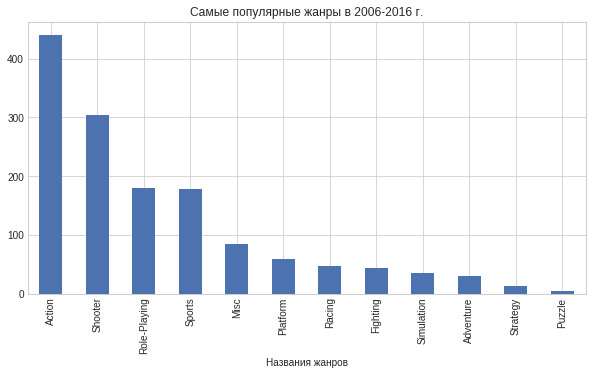

In [257]:
(
relevant_years
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', figsize=(10, 5), legend=False, title='Самые популярные жанры в 2006-2016 г.')
    .set_xlabel('Названия жанров')
)

Самыми популярными жанрами являются наиболее активные: Action, Shooter и Sports. Как правило именно они подходят для снятия напряжения после длинного рабочего/учебного дня, так как весь геймплей строится на эксплуатации физических возможностей игрока и почти не затрагивает умственную активность. 

Самыми непопулярными являются Adventure, Puzzle и Strategy, которые наоборот - требуют постоянного решения головоломок или выстраивания долгосрочной стратегии по развитию своего населенного пункта. 

## Часть 3. Портрет пользователя каждого региона 

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 1. Северная Америка (na_sales) <a id='6-bullet'></a>

In [258]:
# функция для круговой диаграммы

def top5_region_pie(column, region):
    return (
        relevant_years
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
            .plot(kind='pie', y=region, autopct='%1.0f%%', textprops={'fontsize': 14}, figsize=(10, 5), legend=False)
            .set_ylabel('')
    )

#### Топ-5 платформ

Text(0, 0.5, '')

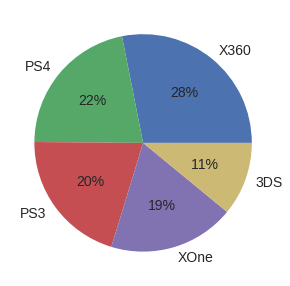

In [259]:
top5_region_pie('platform', 'na_sales')

In [260]:
(relevant_years
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head(5)
)

,na_sales
platform,
X360,138.76
PS4,107.38
PS3,100.74
XOne,92.63
3DS,54.05


Американцы предпочитают отечественный продукт - X360 и XOne: доля данных платформ выше чем в Европе и Японии

#### Топ-5 жанров

Text(0, 0.5, '')

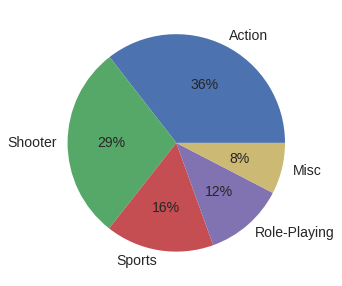

In [261]:
top5_region_pie('genre', 'na_sales')

Распределение по жанрам совпадает с общемировым: в США любят жанры Action и Shooter. Присутствует и любовь к спортивным симуляторам. На американском рынке пользуются популярностью "эксклюзивы" вроде игр по американскому футболу, баскетболу и тд, которые неособо популярны в других регионах

**Описание рейтингов от ESRB**

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше. Обычно представляют собой развивающие игры
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Могут содержать немного больше мультипликационного или мягкого насилия.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

#### Распределение продаж по рейтингу ESRB

Text(0, 0.5, '')

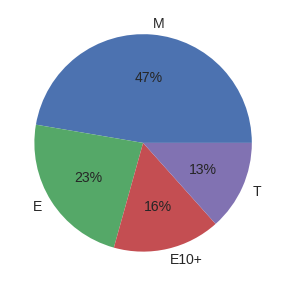

In [262]:
top5_region_pie('rating', 'na_sales')

#### Портрет североамериканского пользователя:

Самые популярные платформы: 
- X360: $138,76 млн или 28% всех продаж

- PS4:  $107,38 млн или 22% всех продаж

- PS3:  $100.74 млн или 20% всех продаж

- XOne: $92,63 млн или 19% всех продаж

- 3DS:  $54,05 млн или 11% всех продаж

Самые популярные жанры: Action (36%), Shooter (29%), Sports (11%), Role-Playing (12%) и Misc (8%)

Распределение по рейтингу ESRB (60% приходится на аудиторию от 13 лет и старше): 
- от 6 лет и старше: 23% продаж
- от 10 лет и старше: 16% продаж
- от 13 лет и старше: 13% продаж
- от 17 лет и старше: 47% продаж


### 2. Европа (eu_sales) <a id='7-bullet'></a>

#### Топ-5 платформ

Text(0, 0.5, '')

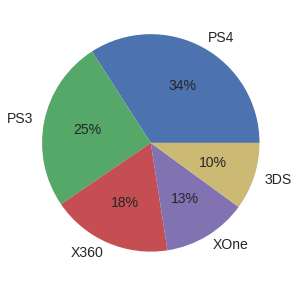

In [263]:
top5_region_pie('platform', 'eu_sales')

In [264]:
(relevant_years
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head(5)
)

,eu_sales
platform,
PS4,139.69
PS3,104.27
X360,73.39
XOne,51.27
3DS,41.10


В Европе больше предпочитают продукцию Sony, чем в США: PS3 и PS4 весьма популярны, но 18% всех продаж все таки приходится на X360.

#### Топ-5 жанров

Text(0, 0.5, '')

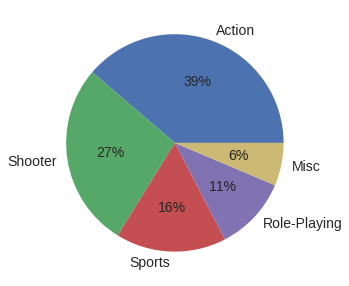

In [265]:
top5_region_pie('genre', 'eu_sales')

Главные жанры теже что и в США: Action, Shooter и Sport (видимо сказывается популярность футбола)

#### Распределение продаж по рейтингу ESRB

Text(0, 0.5, '')

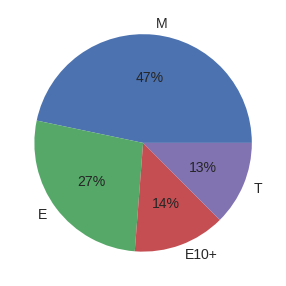

In [266]:
top5_region_pie('rating', 'eu_sales')


#### Портрет европейского пользователя:

Самые популярные платформы: 

- PS4:  $139,69 или 34% всех продаж

- PS3:  $104.27 или 25% всех продаж

- Х360: $73,39 или 18% всех продаж

- ХOne:  $51,27 или 13% всех продаж

- 3DS:  $41,10 или 10% всех продаж

Самые популярные жанры: Action (39%), Shooter (27%), Sports (16%), Role-Playing (11%) и Misc (6%)

Распределение по рейтингу ESRB (60% приходится на аудиторию от 13 лет и старше): 
- от 6 лет и старше: 27% продаж
- от 10 лет и старше: 14% продаж
- от 13 лет и старше: 13% продаж
- от 17 лет и старше: 47% продаж

Американские и европейские пользователи имеют очень похожие предпочтения, за исключением более высокой доли японских приставок в Европе по сравнению с США.


### 3. Япония (jp_sales) <a id='8-bullet'></a>

#### Топ-5 платформ

Text(0, 0.5, '')

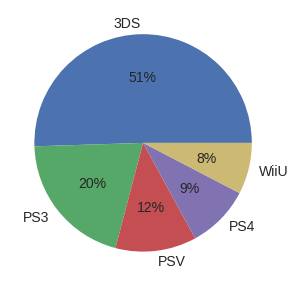

In [267]:
top5_region_pie('platform', 'jp_sales')

In [268]:
(relevant_years
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head(5)
)

,jp_sales
platform,
3DS,83.63
PS3,33.78
PSV,19.94
PS4,15.59
WiiU,12.65


В Японии активно пользуются отечественной продукцией от компаний Sony (PS3 и PSP), Nintendo (3DS, DS и Wii). Стоит заметить также высокую популярность портативных консолей. Ни одна приставка от Microsoft не попала в топ-5.

#### Топ-5 жанров

Text(0, 0.5, '')

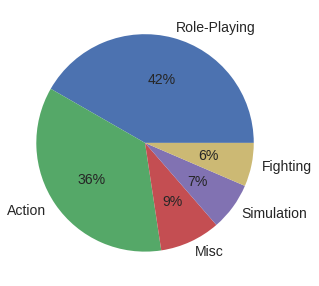

In [269]:
top5_region_pie('genre', 'jp_sales')

В Японии любят Role-Playing гораздо больше, чем в других регионах - 42% всех продаж приходится именно на него.

#### Распределение продаж по рейтингу ESRB

Text(0, 0.5, '')

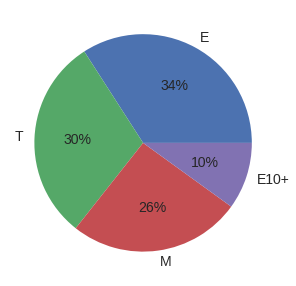

In [270]:
top5_region_pie('rating', 'jp_sales')


#### Портрет японского  пользователя:

Самые популярные платформы: 

- 3DS:  $83,63 или 51% всех продаж

- PS3:  $33,78 или 20% всех продаж

- PSV: $19,94 или 12% всех продаж

- PS4:  $15,59 или 9% всех продаж

- WiiU:  $12,65 или 8% всех продаж

Самые популярные жанры: Role-Playing (42%), Action (36%), Misc (9%), Simulation (7%) и Fighting (6%) 

Распределение по рейтингу ESRB (56% приходится на аудиторию от 13 лет и старше): 
- от 6 лет и старше: 34% продаж
- от 10 лет и старше: 10% продаж
- от 13 лет и старше: 30% продаж
- от 17 лет и старше: 26% продаж

По всей видимости, в Японии любят "кавайные" игры, в которых отсутствует жестокость и насилие: 34% самая высокая доля среди анализируемых рынков. Присутвуют и другие отличия от западных пользователей: популярность портативных платформ и жанра Role-Playing.


## Часть 4. Проверка гипотез

### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a id='9-bullet'></a>

Гипотезы:
- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

Использовать будем t-критерий Стьюдента, так как сравниваемые выборки являются независимыми

В столбце с пользовательскими рейтингами присутствует большое количество пропущенных значений, в результате чего реальный размер выборки достаточно небольшой, а значения представленны в разных пропорциях. Поэтому alpha = 0.05

In [271]:
print('Количество непропущенных значений по XOne: ', xone['user_score'].count())
print('Количество непропущенных значений по PC: ', relevant_years.query('platform == "PC"')['user_score'].count())

Количество непропущенных значений по XOne:  181
Количество непропущенных значений по PC:  208


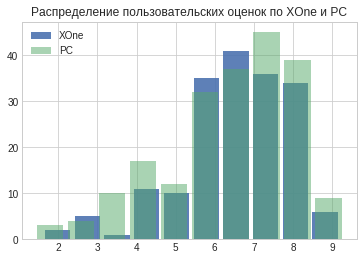

In [272]:
plt.title('Распределение пользовательских оценок по XOne и PC')
xone['user_score'].hist(bins=10, alpha=0.9, rwidth=0.85, label='XOne')
pc['user_score'].hist(bins=10, alpha=0.5, rwidth=0.85, label='PC')
plt.legend()
plt.show()

In [273]:
# оценим дисперсию по имеющейся выборке
print('PC:',np.var(pc['user_score'], ddof=1))
print('XOne:',np.var(xone['user_score'], ddof=1))

PC: 2.735733695652174
XOne: 1.888588090853284


In [274]:
alpha = 0.05

pc = relevant_years.query('platform == "PC"')
print('Средняя оценка PC', pc['user_score'].mean())
print('Средняя оценка Xbox One', xone['user_score'].mean())

results = st.ttest_ind(xone['user_score'], pc['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка PC 6.418749999999999
Средняя оценка Xbox One 6.508839779005524
p-значение: 0.5628124757518109
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу, а значит она верна - **средний пользовательский рейтинг платформ Xbox One и PC одинаковый**.

### 2. Средние пользовательские рейтинги жанров Action и Sports разные <a id='10-bullet'></a>

Гипотезы:
- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
- H1: средний пользовательский рейтинг жанров Action и Sports различается

Использовать будем t-критерий Стьюдента, так как сравниваемые выборки являются независимыми. В этот раз данных у нас больше, поэтому применим alpha = 0.01

In [275]:
action = relevant_years.query("genre == 'Action'")
sports = relevant_years.query("genre == 'Sports'")

print('Количество непропущенных значений по Action: ', action['user_score'].count())
print('Количество непропущенных значений по Sports: ', sports['user_score'].count())

Количество непропущенных значений по Action:  524
Количество непропущенных значений по Sports:  193


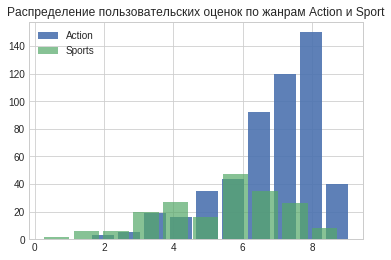

In [276]:
plt.title('Распределение пользовательских оценок по жанрам Action и Sport')
action['user_score'].hist(bins=10, alpha=0.9, rwidth=0.85, label='Action')
sports['user_score'].hist(bins=10, alpha=0.7, rwidth=0.85, label='Sports')
plt.legend()
plt.show()

In [277]:
# оценим дисперсию по имеющейся выборке

print('Action:',np.var(action['user_score'], ddof=1))
print('Sports:',np.var(sports['user_score'], ddof=1))

Action: 1.8920506692160617
Sports: 3.035276338514681


In [278]:
alpha = 0.01

print('Средняя оценка Action', action['user_score'].mean())
print('Средняя оценка Sports', sports['user_score'].mean())

results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка Action 6.825
Средняя оценка Sports 5.44300518134715
p-значение: 2.1640735579993415e-26
Отвергаем нулевую гипотезу


Вероятность получить данные различия случайно невероятно мала, а значит отвергаем нулевую гипотезу. Таким образом, верна альтернативная - **средний пользовательский рейтинг жанров Action и Sports различается**.



### 3. Общий вывод <a id='11-bullet'></a>

Регионы имеют свою специфику:
- на Западе популярны платформы X360 и PS3, а также жанры Shooter, Action и Sport. При этом, стоит обратить внимание на такие платформы как Xbox One и PS4, которые появились недавно и только начали набирать популярность. На момент исследования у них есть еще около шести лет, в течение которых они будут актуальными.
- Игры в жанре RPG хорошо идут в Японии, но стоит учитывать региональные особенности: популярность платформ от Sony и портативных консолей. 
- финансово выгодно продавать игры, доступные для всех возрастных категорий
- несмотря на широкую распространенность ПК ориентироваться на них не стоит: гораздо выгоднее сосредоточится на приставках.